<a href="https://colab.research.google.com/github/JoaoMMS98/ML_2.0/blob/main/PCA_analysis_and_feature_engineering_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
traindf = pd.read_csv('traindf.csv')
valdf = pd.read_csv('valdf.csv')
test = pd.read_csv('testdf.csv')

In [4]:
test.shape

(387975, 28)

In [5]:
merged_df = pd.concat([traindf, valdf], ignore_index=True)

In [6]:
merged_df

,Claim Injury Type,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,...,Agreement Reached,Number of Dependents,Accident Year,Received_C2,Received_C3,Hearing_held,Attorney/Representative_Y,COVID-19 Indicator_Y,Alternative Dispute Resolution_Y,Gender_M
0,4. TEMPORARY,0.518093,-0.020370,1.353821,-0.495974,-0.028681,-2.352697,PROPERTY AND CASUALTY,0.497548,QUEENS,...,0.0,1.497677,2021.0,1,1,1,1,0,0,0
1,3. MED ONLY,-0.875110,-0.511111,1.402126,0.955044,-0.531549,0.000000,HEALTH & HOSPITAL CORP.,0.212179,BRONX,...,0.0,-0.501860,2022.0,1,1,1,0,0,0,0
2,2. NON-COMP,0.078134,0.609259,0.000000,-0.133220,0.621415,0.000000,AMERICAN ZURICH INSURANCE CO,0.497548,KINGS,...,0.0,-0.001976,2020.0,1,1,1,0,0,0,1
3,2. NON-COMP,-1.315068,0.051852,0.000000,1.317798,0.045889,0.000000,"NORDSTROM, INC.",0.091843,KINGS,...,0.0,-1.001744,2021.0,1,1,1,0,0,0,1
4,3. MED ONLY,-0.068519,-0.440741,1.223679,0.156984,-0.472275,-3.170124,NEW YORK BLACK CAR OPERATORS',0.091843,NASSAU,...,0.0,0.497909,2022.0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574020,4. TEMPORARY,-0.215172,0.120370,1.376163,0.229535,0.116635,0.000000,PUBLIC EMPLOYERS RISK MGMT.,0.212179,DELAWARE,...,0.0,-0.001976,2021.0,1,1,1,0,0,0,1
574021,2. NON-COMP,-0.361825,0.068519,0.000000,0.374636,0.059273,-2.045643,STATE INSURANCE FUND,0.193546,QUEENS,...,0.0,-1.501629,2021.0,1,1,1,1,0,0,0
574022,3. MED ONLY,0.224787,-0.492593,0.000000,-0.133220,-0.516252,0.000000,DUTCHESS COUNTY SELF-INS PLAN,0.212179,DUTCHESS,...,0.0,0.497909,2022.0,1,1,1,0,0,0,1
574023,4. TEMPORARY,1.471337,0.990741,1.387051,-1.511687,1.011472,0.029046,NEW JERSEY MANUFACTURERS,0.497548,NASSAU,...,0.0,1.497677,2020.0,1,1,1,1,0,0,1


In [7]:
# Create a copy of merged_df
cleaned_df = merged_df.copy()

# Drop the specified columns
cleaned_df = cleaned_df.drop(columns=[  'Claim Injury Type','Zip Code', 'Agreement Reached'                                    ])

# Keep only numeric columns
analysis_df = cleaned_df.select_dtypes(include=['number'])

In [8]:
# Create a copy of merged_df
cleaned_test = test.copy()

# Drop the specified columns
cleaned_test = cleaned_test.drop(columns=[  'Zip Code' , 'Alternative Dispute Resolution_U'                               ])

# Keep only numeric columns
test_df = cleaned_test.select_dtypes(include=['number'])

In [9]:
test_df

,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Type,First Hearing Date,IME-4 Count,Industry Code,...,WCIO Part Of Body Code,Number of Dependents,Accident Year,Received_C2,Received_C3,Hearing_held,Attorney/Representative_Y,COVID-19 Indicator_Y,Alternative Dispute Resolution_Y,Gender_M
0,-1.755027,-0.964815,0.0,1.825655,-1.003824,0.000000,0.497548,0.0,0.0,0.065062,...,0.020324,-1.001744,2022.0,1,1,1,0,0,0,1
1,-1.755027,-0.964815,0.0,1.825655,-1.003824,0.000000,0.497548,0.0,0.0,0.031538,...,0.013771,-1.001744,2022.0,1,1,1,0,0,0,0
2,1.178031,-0.964815,0.0,-1.076382,-1.000000,0.000000,0.497548,0.0,0.0,0.036891,...,0.002023,-1.501629,2022.0,1,1,1,0,0,0,0
3,0.884725,-0.964815,0.0,-143.493821,-1.003824,0.000000,0.497548,0.0,0.0,0.065062,...,0.083779,1.497677,2022.0,1,1,1,0,0,0,0
4,-1.315068,-0.964815,0.0,1.390349,-1.000000,0.000000,0.497548,0.0,0.0,0.000632,...,0.021743,0.997793,2022.0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387970,0.664746,-1.927778,0.0,-1.294035,6.114723,0.000000,0.193546,0.0,0.0,0.017332,...,0.029537,0.997793,2012.0,1,1,1,0,0,0,1
387971,1.178031,-1.927778,0.0,-0.931280,0.145315,-6.510373,0.212179,0.0,0.0,0.017332,...,0.029537,-1.001744,2024.0,1,1,1,1,0,0,0
387972,0.151461,-1.927778,0.0,0.084433,0.145315,0.000000,0.193546,0.0,0.0,0.017332,...,0.029537,0.997793,2024.0,1,1,1,1,0,0,1
387973,-0.068519,-1.927778,0.0,0.229535,0.145315,-6.481328,0.091843,0.0,0.0,0.017332,...,0.029537,0.997793,2024.0,1,1,1,1,0,0,1


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
analysis_df['Accident Year'] = scaler.fit_transform(analysis_df[['Accident Year']])
analysis_df['First Hearing Date'] = scaler.fit_transform(analysis_df[['First Hearing Date']])
test_df['Accident Year'] = scaler.fit_transform(test_df[['Accident Year']])
test_df['First Hearing Date'] = scaler.fit_transform(test_df[['First Hearing Date']])

In [11]:
test_df


,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Type,First Hearing Date,IME-4 Count,Industry Code,...,WCIO Part Of Body Code,Number of Dependents,Accident Year,Received_C2,Received_C3,Hearing_held,Attorney/Representative_Y,COVID-19 Indicator_Y,Alternative Dispute Resolution_Y,Gender_M
0,-1.755027,-0.964815,0.0,1.825655,-1.003824,0.000000,0.497548,0.345483,0.0,0.065062,...,0.020324,-1.001744,-0.668713,1,1,1,0,0,0,1
1,-1.755027,-0.964815,0.0,1.825655,-1.003824,0.000000,0.497548,0.345483,0.0,0.031538,...,0.013771,-1.001744,-0.668713,1,1,1,0,0,0,0
2,1.178031,-0.964815,0.0,-1.076382,-1.000000,0.000000,0.497548,0.345483,0.0,0.036891,...,0.002023,-1.501629,-0.668713,1,1,1,0,0,0,0
3,0.884725,-0.964815,0.0,-143.493821,-1.003824,0.000000,0.497548,0.345483,0.0,0.065062,...,0.083779,1.497677,-0.668713,1,1,1,0,0,0,0
4,-1.315068,-0.964815,0.0,1.390349,-1.000000,0.000000,0.497548,0.345483,0.0,0.000632,...,0.021743,0.997793,-0.668713,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387970,0.664746,-1.927778,0.0,-1.294035,6.114723,0.000000,0.193546,0.345483,0.0,0.017332,...,0.029537,0.997793,-6.841511,1,1,1,0,0,0,1
387971,1.178031,-1.927778,0.0,-0.931280,0.145315,-6.510373,0.212179,0.345483,0.0,0.017332,...,0.029537,-1.001744,0.565847,1,1,1,1,0,0,0
387972,0.151461,-1.927778,0.0,0.084433,0.145315,0.000000,0.193546,0.345483,0.0,0.017332,...,0.029537,0.997793,0.565847,1,1,1,1,0,0,1
387973,-0.068519,-1.927778,0.0,0.229535,0.145315,-6.481328,0.091843,0.345483,0.0,0.017332,...,0.029537,0.997793,0.565847,1,1,1,1,0,0,1


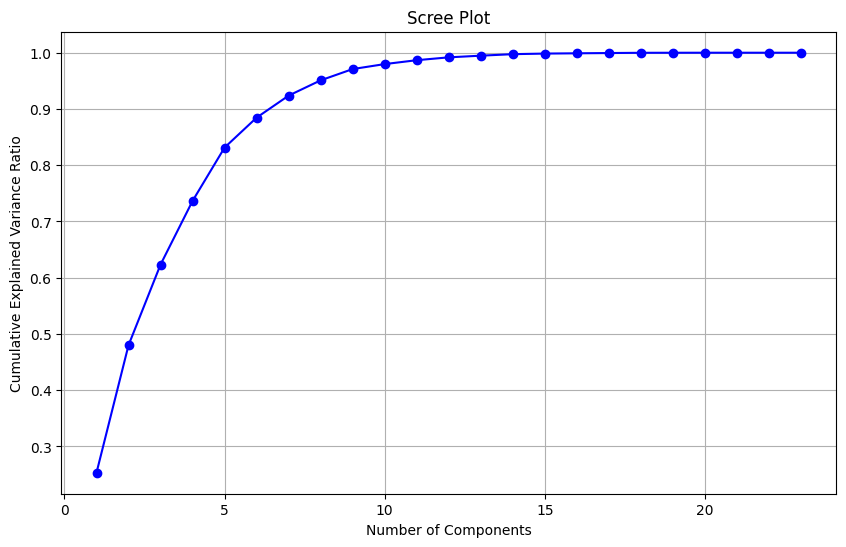

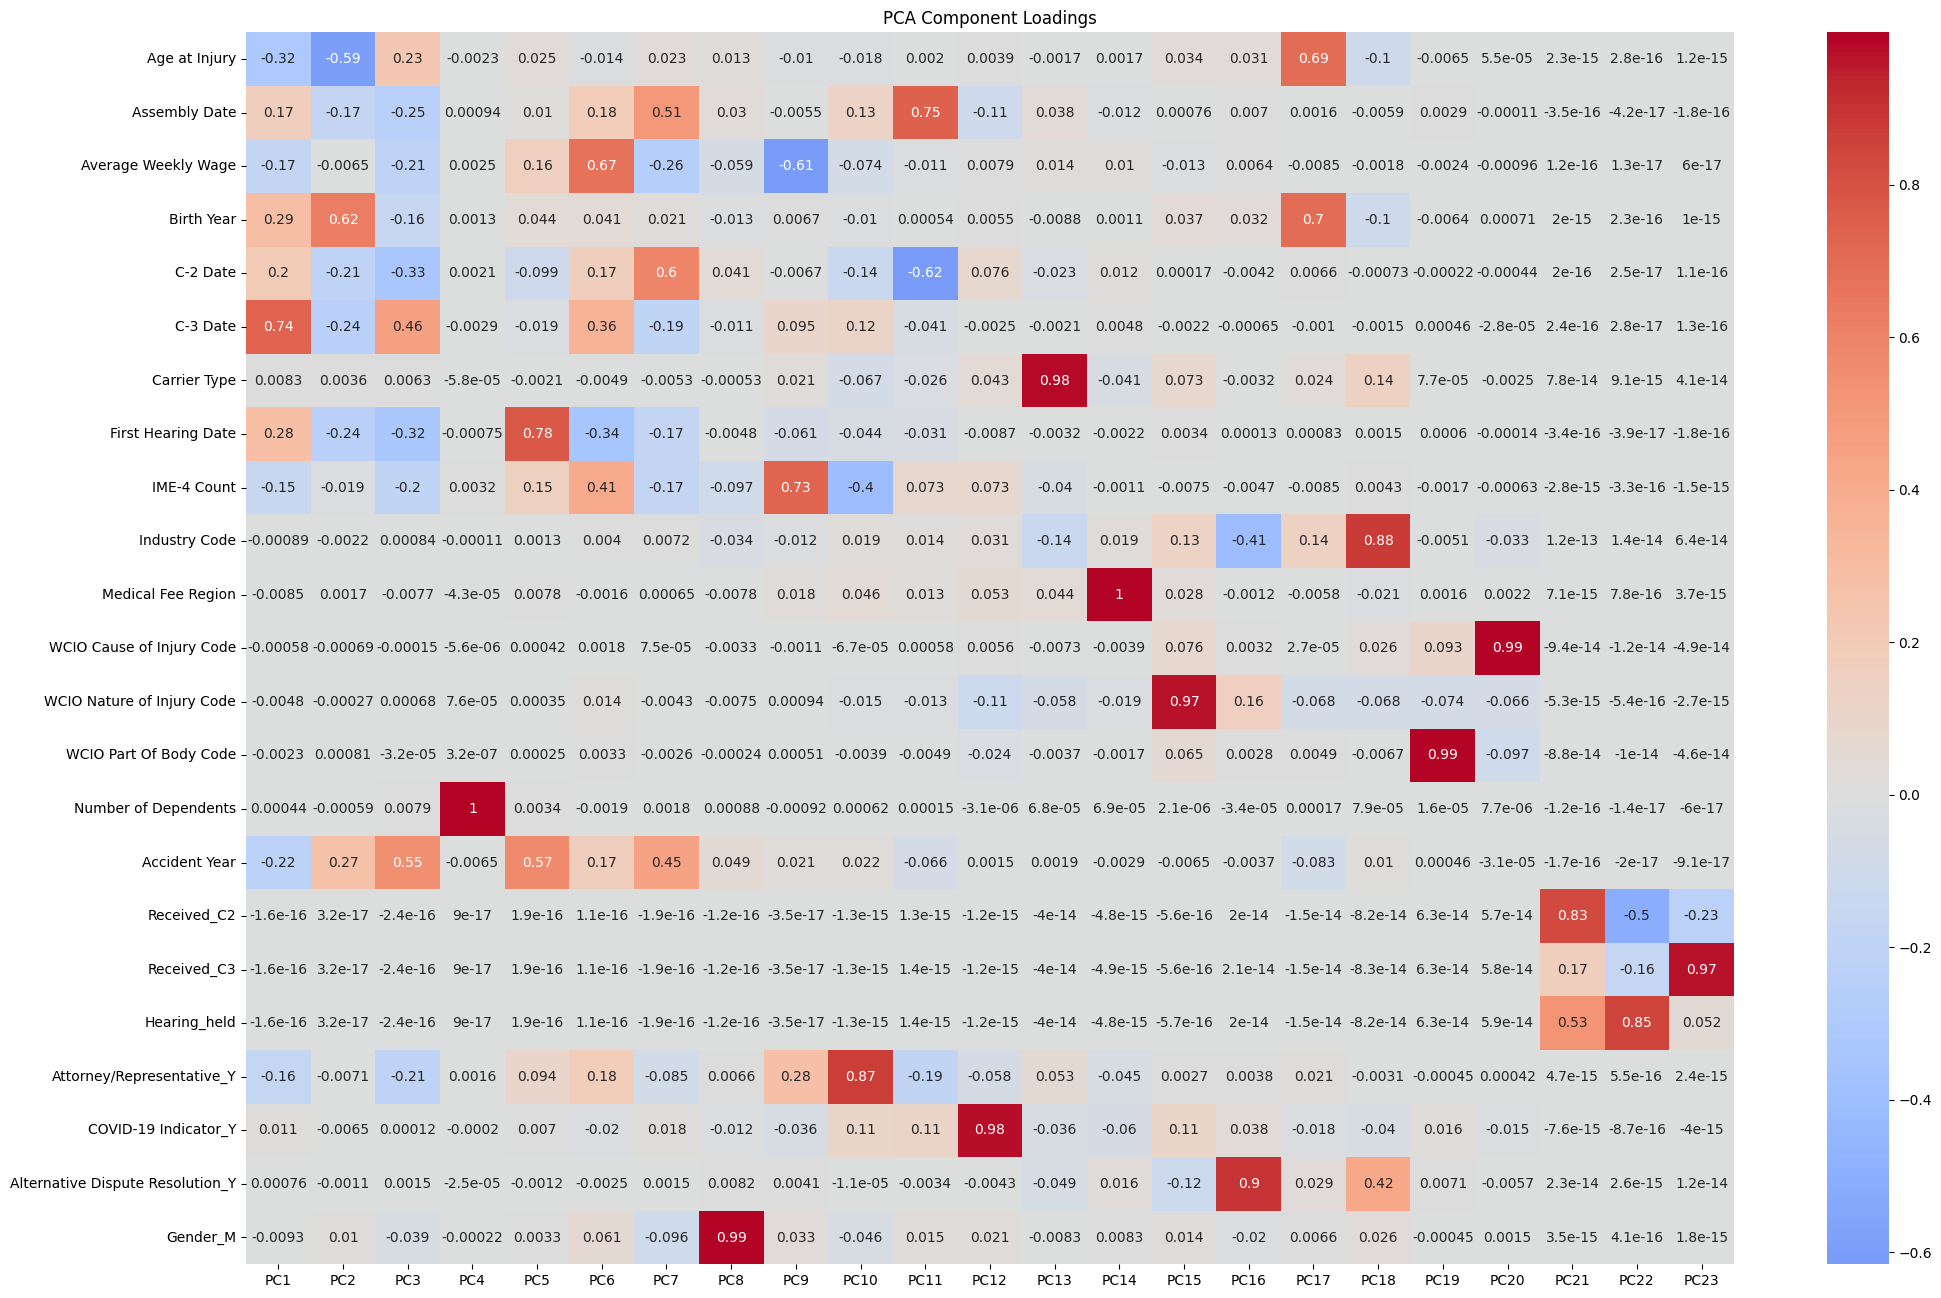

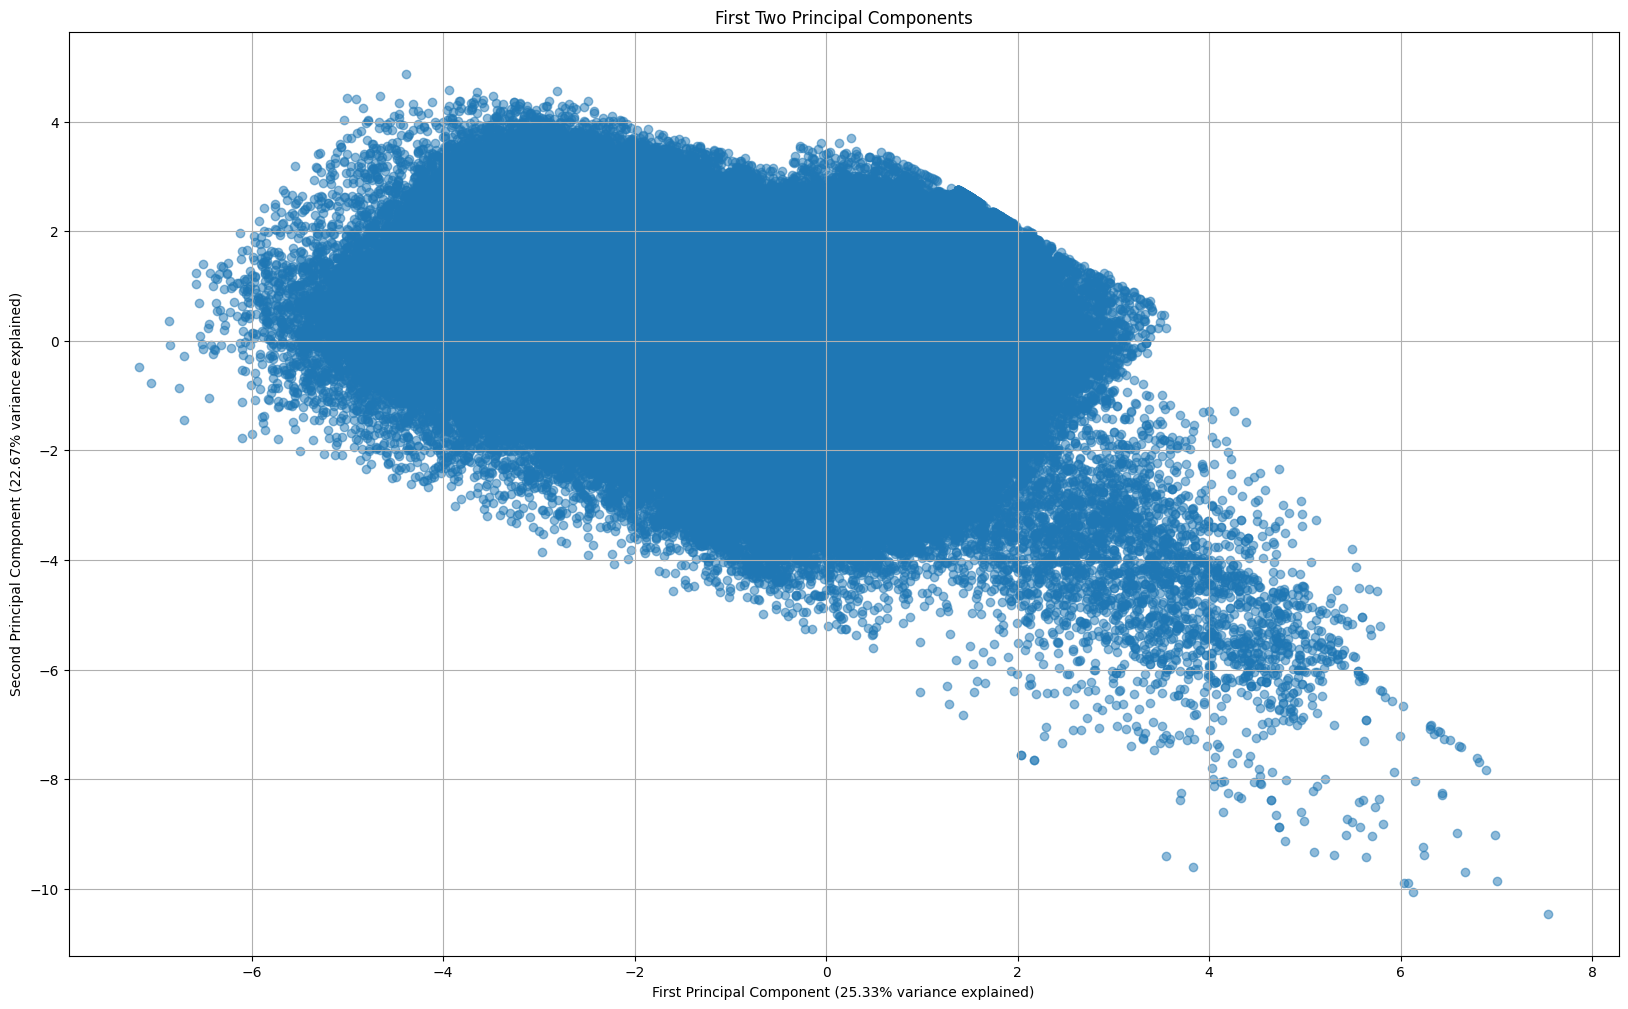


PCA Summary:
--------------------------------------------------
Number of components: 23
Total variance explained: 100.00%

Individual variance explained by each component:
PC1: 25.33%
PC2: 22.67%
PC3: 14.33%
PC4: 11.32%
PC5: 9.49%
PC6: 5.32%
PC7: 3.92%
PC8: 2.72%
PC9: 2.00%
PC10: 0.88%
PC11: 0.69%
PC12: 0.51%
PC13: 0.30%
PC14: 0.27%
PC15: 0.11%
PC16: 0.05%
PC17: 0.05%
PC18: 0.04%
PC19: 0.01%
PC20: 0.01%
PC21: 0.00%
PC22: 0.00%
PC23: 0.00%

Top features for each component:

PC1 top features:
C-3 Date: 0.736
Age at Injury: -0.317
Birth Year: 0.288
First Hearing Date: 0.282
Accident Year: -0.218
C-2 Date: 0.198

PC2 top features:
Birth Year: 0.622
Age at Injury: -0.592
Accident Year: 0.273
First Hearing Date: -0.242
C-3 Date: -0.236
C-2 Date: -0.211

PC3 top features:
Accident Year: 0.551
C-3 Date: 0.461
C-2 Date: -0.330
First Hearing Date: -0.324
Assembly Date: -0.248
Age at Injury: 0.234


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def perform_pca_analysis(df, n_components=None, scale=True, categorical_columns=None):
    """
    Perform PCA analysis on a dataframe with detailed visualizations and analysis.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe for PCA analysis
    n_components : int, optional
        Number of components to keep. If None, keep all components
    scale : bool, default=True
        Whether to scale the data before PCA
    categorical_columns : list, optional
        List of categorical columns to exclude from PCA

    Returns:
    --------
    dict containing:
        - pca : PCA object
        - transformed_data : PCA transformed data
        - loadings : Component loadings
        - explained_variance : Explained variance ratios
        - scaler : StandardScaler object if scaling was performed
    """
    # Make a copy of the dataframe
    df_copy = df.copy()

    # Remove categorical columns if specified
    if categorical_columns:
        df_copy = df_copy.drop(columns=categorical_columns)

    # Handle missing values
    df_copy = df_copy.select_dtypes(include=[np.number])  # Keep only numeric columns
    df_copy = df_copy.fillna(df_copy.mean())  # Fill missing values with mean

    # Scale the data
    scaler = None
    if scale:
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_copy)
    else:
        scaled_data = df_copy.values

    # Perform PCA
    if n_components is None:
        n_components = min(df_copy.shape)

    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(scaled_data)

    # Create visualizations

    # 1. Scree plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
            np.cumsum(pca.explained_variance_ratio_), 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.grid(True)
    plt.show()

    # 2. Feature loadings heatmap
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
        index=df_copy.columns
    )

    plt.figure(figsize=(24, 16))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
    plt.title('PCA Component Loadings')
    plt.show()

    # 3. First two components scatter plot (if applicable)
    if n_components >= 2:
        plt.figure(figsize=(20, 12))
        plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.5)
        plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance explained)')
        plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance explained)')
        plt.title('First Two Principal Components')
        plt.grid(True)
        plt.show()

    # Print summary statistics
    print("\nPCA Summary:")
    print("-" * 50)
    print(f"Number of components: {n_components}")
    print(f"Total variance explained: {np.sum(pca.explained_variance_ratio_):.2%}")
    print("\nIndividual variance explained by each component:")
    for i, var in enumerate(pca.explained_variance_ratio_):
        print(f"PC{i+1}: {var:.2%}")

    # Find most important features for each component
    n_top_features = 6
    print("\nTop features for each component:")
    for i in range(min(3, n_components)):  # Show for first 3 components
        sorted_loadings = loadings[f'PC{i+1}'].abs().sort_values(ascending=False)
        print(f"\nPC{i+1} top features:")
        for feat, load in sorted_loadings[:n_top_features].items():
            print(f"{feat}: {loadings.loc[feat, f'PC{i+1}']:.3f}")

    return {
        'pca': pca,
        'transformed_data': transformed_data,
        'loadings': loadings,
        'explained_variance': pca.explained_variance_ratio_,
        'scaler': scaler
    }

# Example usage:
"""
# Assuming analysis_df is your dataframe:
categorical_cols = ['your_categorical_columns']  # Replace with actual categorical columns
pca_results = perform_pca_analysis(analysis_df,
                                 n_components=5,  # Or any number you prefer
                                 categorical_columns=categorical_cols)

# Access results
transformed_data = pca_results['transformed_data']
loadings = pca_results['loadings']
explained_variance = pca_results['explained_variance']
"""

pca_results = perform_pca_analysis(analysis_df, scale=False)

14 components are safe to use for dimensionality reduction, they capture >99% of variance
Remove COVID 19, alternative dispute resolution, agreement reached
because they are >0.9 in later components

In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def process_and_predict(analysis_df, claim_injury_type, variance_threshold, first_run=False):
   # Label encode target
   le = LabelEncoder()
   y = le.fit_transform(claim_injury_type)
   X = analysis_df

   # Fresh train-test split for this iteration
   X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

   # Apply PCA
   pca = PCA(n_components=variance_threshold, svd_solver='full')
   X_train_pca = pca.fit_transform(X_train)
   X_val_pca = pca.transform(X_val)

   # Train XGBoost
   model = XGBClassifier(random_state=42)
   model.fit(X_train_pca, y_train)

   # Get predictions and scores
   train_pred = model.predict(X_train_pca)
   val_pred = model.predict(X_val_pca)

   train_f1 = f1_score(y_train, train_pred, average='macro')
   val_f1 = f1_score(y_val, val_pred, average='macro')

   n_components = X_train_pca.shape[1]

   if first_run:
       # Get feature importance for first run
       importance = model.feature_importances_
       feature_importance = pd.DataFrame({
           'Component': [f'PC{i+1}' for i in range(n_components)],
           'Importance': importance
       })
       feature_importance = feature_importance.sort_values('Importance', ascending=False)
       print("\nFeature Importance for first run:")
       print(feature_importance)

   return train_f1, val_f1, n_components

# Get Claim Injury Type back from merged_df
claim_injury_type = merged_df['Claim Injury Type']

# Test different variance thresholds
thresholds = [14]

for i, threshold in enumerate(thresholds):
   train_f1, val_f1, n_components = process_and_predict(analysis_df, claim_injury_type, threshold, first_run=(i==0))
   print(f"\nVariance threshold: {threshold}")
   print(f"Number of components: {n_components}")
   print(f"Train F1-macro: {train_f1:.4f}")
   print(f"Val F1-macro: {val_f1:.4f}")


Feature Importance for first run:
   Component  Importance
5        PC6    0.504276
8        PC9    0.162409
9       PC10    0.066877
2        PC3    0.048751
4        PC5    0.039324
10      PC11    0.038675
0        PC1    0.027331
11      PC12    0.023486
6        PC7    0.021966
7        PC8    0.019801
12      PC13    0.017203
13      PC14    0.015527
1        PC2    0.009277
3        PC4    0.005097

Variance threshold: 14
Number of components: 14
Train F1-macro: 0.6152
Val F1-macro: 0.3833


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def process_and_predict(analysis_df, claim_injury_type):
    # Label encode target
    le = LabelEncoder()
    y = le.fit_transform(claim_injury_type)
    X = analysis_df

    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train XGBoost
    model = XGBClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Get predictions and scores
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    # Calculate metrics
    train_f1 = f1_score(y_train, train_pred, average='macro')
    val_f1 = f1_score(y_val, val_pred, average='macro')
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)

    # Get feature importance
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': analysis_df.columns,
        'Importance': importance
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    return train_f1, val_f1, train_acc, val_acc, feature_importance

# Run model and get results
train_f1, val_f1, train_acc, val_acc, feature_importance = process_and_predict(analysis_df, claim_injury_type)

print("\nModel Performance:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Val Accuracy: {val_acc:.4f}")
print(f"Train F1-macro: {train_f1:.4f}")
print(f"Val F1-macro: {val_f1:.4f}")

print("\nFeature Importance Ranking:")
pd.set_option('display.max_rows', None)
print(feature_importance)

In [14]:
claim_injury_type = merged_df['Claim Injury Type']

NameError: name 'X_train' is not defined

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

def perform_optimized_grid_search(analysis_df, claim_injury_type):
    # Label encode target
    le = LabelEncoder()
    y = le.fit_transform(claim_injury_type)
    X = analysis_df

    # Define parameter grid with slightly wider ranges but still ~1000 combinations
    param_grid = {
        'learning_rate': [0.01, 0.05, 0,1, 0.3, 0.5, 0.7],  # Baseline 0.05
        'max_depth': [5, 10, 15, 20, 25],  # Baseline 6
        'min_child_weight': [6, 7,  8, 9, 10],  # Baseline 8
        'subsample': [0.4, 0.5, 0.6,  0.7, 0.8],  # Baseline 0.6
        # 'colsample_bytree': [0.8, 0.85, 0.9],  # Baseline 0.85
        # 'gamma': [0.4, 0.5, 0.6],  # Baseline 0.5
        'n_estimators': [300, 450, 600],  # Baseline 450
    }

    # Create base model with fixed parameters
    model = XGBClassifier(
        objective='multi:softmax',
        random_state=42,
        reg_alpha=0.1,  # Fix reg_alpha at baseline
        reg_lambda=0.1,  # Fix reg_lambda at baseline
        tree_method='hist'  # Use histogram-based algorithm for better memory efficiency
    )

    # Calculate total combinations
    total_combinations = np.prod([len(v) for v in param_grid.values()])
    print(f"\nSearching through {total_combinations} parameter combinations...")

    # Set up GridSearchCV with stratified k-fold
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring='f1_macro',
        n_jobs=-1,
        verbose=2,
        pre_dispatch='2*n_jobs'  # Control number of jobs that get dispatched
    )

    # Perform grid search
    print("Starting grid search...")
    grid_search.fit(X, y)

    # Get best parameters and score
    print("\nBest parameters found:")
    for param, value in grid_search.best_params_.items():
        print(f"- {param}: {value}")
    print(f"\nBest F1-macro score: {grid_search.best_score_:.4f}")

    # Create DataFrame of all results and sort by score
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df = results_df.sort_values('rank_test_score')

    # Select relevant columns and format scores
    important_cols = ['rank_test_score', 'mean_test_score', 'std_test_score']
    param_cols = [col for col in results_df.columns if col.startswith('param_')]
    results_df = results_df[important_cols + param_cols]

    # Save all results
    results_df.to_csv('grid_search_results.csv', index=False)

    # Display top 5 combinations
    print("\nTop 5 Parameter Combinations:")
    print(results_df.head())

    return grid_search.best_params_, grid_search.best_score_, results_df

def train_final_model(X, y, best_params, fixed_params={'reg_alpha': 0.1, 'reg_lambda': 0.1}):
    # Combine best parameters with fixed parameters
    all_params = {**best_params, **fixed_params}

    # Train model with all parameters
    model = XGBClassifier(
        objective='multi:softmax',
        random_state=42,
        tree_method='hist',
        **all_params
    )

    # Split data for validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model.fit(X_train, y_train)

    # Get predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    # Calculate metrics
    metrics = {
        'train_f1': f1_score(y_train, train_pred, average='macro'),
        'val_f1': f1_score(y_val, val_pred, average='macro'),
        'train_accuracy': accuracy_score(y_train, train_pred),
        'val_accuracy': accuracy_score(y_val, val_pred)
    }

    return model, metrics

# Run grid search
best_params, best_score, results_df = perform_optimized_grid_search(analysis_df, claim_injury_type)

# Train final model with best parameters
le = LabelEncoder()
y = le.fit_transform(claim_injury_type)
final_model, metrics = train_final_model(analysis_df, y, best_params)

# Print final metrics
print("\nFinal Model Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Run grid search
best_params, best_score, results_df = perform_optimized_grid_search(analysis_df, claim_injury_type)

# Train final model with best parameters
le = LabelEncoder()
y = le.fit_transform(claim_injury_type)
final_model, metrics = train_final_model(analysis_df, y, best_params)

# Print final metrics
print("\nFinal Model Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


Searching through 2625 parameter combinations...
Starting grid search...
Fitting 3 folds for each of 2625 candidates, totalling 7875 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [69]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def process_and_predict(analysis_df, claim_injury_type, test_df):
    # Label encode target
    le = LabelEncoder()
    y = le.fit_transform(claim_injury_type)
    X = analysis_df

    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create model with specified parameters
    model = XGBClassifier(
        objective='multi:softmax',
        random_state=42,
        learning_rate=0.05,  # 0,05
        max_depth=6, #6
        min_child_weight=8,
        subsample=0.6,
        colsample_bytree=0.85,
        gamma=0.5,
        n_estimators=450,
        reg_alpha=0.1,  # L1 regularization,
        reg_lambda=0.1  # L2 regularization
    )

    print("Training model with parameters:")
    for param, value in model.get_params().items():
        if param in ['learning_rate', 'max_depth', 'min_child_weight', 'subsample',
                    'colsample_bytree', 'gamma', 'n_estimators', 'reg_alpha' , 'reg_lambda',]:
            print(f"- {param}: {value}")

    model.fit(X_train, y_train)

    # Get predictions and scores
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    # Calculate metrics
    train_f1 = f1_score(y_train, train_pred, average='macro')
    val_f1 = f1_score(y_val, val_pred, average='macro')
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)

    # Get feature importance
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': analysis_df.columns,
        'Importance': importance
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    # Make predictions on test set
    test_pred = model.predict(test_df)
    # Transform predictions back to original labels
    test_pred_labels = le.inverse_transform(test_pred)

    return train_f1, val_f1, train_acc, val_acc, feature_importance, test_pred_labels

# Run model and get results
train_f1, val_f1, train_acc, val_acc, feature_importance, test_predictions = process_and_predict(analysis_df, claim_injury_type, test_df)

print("\nModel Performance:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Val Accuracy: {val_acc:.4f}")
print(f"Train F1-macro: {train_f1:.4f}")
print(f"Val F1-macro: {val_f1:.4f}")

print("\nFeature Importance Ranking:")
pd.set_option('display.max_rows', None)
print(feature_importance)

print("\nTest Set Predictions (first few rows):")
print(test_predictions[:10])

# Save predictions to CSV
test_predictions_df = pd.DataFrame({
    'Predicted_Claim_Injury_Type': test_predictions
})
test_predictions_df.to_csv('test_predictions.csv', index=False)

# Save feature importance to CSV
feature_importance.to_csv('feature_importance.csv', index=False)

print("\nResults saved to:")
print("- test_predictions.csv")
print("- feature_importance.csv")

Training model with parameters:
- colsample_bytree: 0.825
- gamma: 0.5
- learning_rate: 0.07
- max_depth: 8
- min_child_weight: 6
- n_estimators: 300
- reg_alpha: 0.1
- reg_lambda: 0.1
- subsample: 0.5

Model Performance:
Train Accuracy: 0.8119
Val Accuracy: 0.7928
Train F1-macro: 0.5333
Val F1-macro: 0.4481

Feature Importance Ranking:
                             Feature  Importance
19         Attorney/Representative_Y    0.282852
2                Average Weekly Wage    0.278403
8                        IME-4 Count    0.092121
21  Alternative Dispute Resolution_Y    0.077306
20              COVID-19 Indicator_Y    0.054911
12        WCIO Nature of Injury Code    0.029686
15                     Accident Year    0.027273
6                       Carrier Type    0.020863
13            WCIO Part Of Body Code    0.017532
7                 First Hearing Date    0.017364
9                      Industry Code    0.014607
5                           C-3 Date    0.012515
10                Medica

In [70]:
# Read the sample submission and predictions
sample_submission = pd.read_csv('sample_submission.csv')
test_predictions = pd.read_csv('test_predictions.csv')

# Copy predictions into sample submission format
sample_submission['Claim Injury Type'] = test_predictions['Predicted_Claim_Injury_Type']

# Save as submission file
sample_submission.to_csv('submission.csv', index=False)

# Submit to Kaggle using the API
import subprocess
submission_command = 'kaggle competitions submit -c to-grant-or-not-to-grant -f submission.csv -m "XGBoost baseline without PCA"'
subprocess.run(submission_command, shell=True)

CompletedProcess(args='kaggle competitions submit -c to-grant-or-not-to-grant -f submission.csv -m "XGBoost baseline without PCA"', returncode=0)

In [71]:
import os
import json
import pandas as pd
import subprocess

# Create Kaggle credentials
credentials = {"username":"chielgroeneveld","key":"a823db81aa0c4aa800e0d8ad825fa855"}

# Ensure directory exists and write credentials
os.makedirs('/root/.kaggle', exist_ok=True)
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(credentials, f)
os.chmod('/root/.kaggle/kaggle.json', 0o600)

# Read the files and create submission
sample_submission = pd.read_csv('sample_submission.csv')
test_predictions = pd.read_csv('test_predictions.csv')

# Copy predictions into sample submission format
sample_submission['Claim Injury Type'] = test_predictions['Predicted_Claim_Injury_Type']

# Save as submission file
sample_submission.to_csv('submission.csv', index=False)

# Submit to Kaggle
try:
    result = subprocess.run(
        'kaggle competitions submit -c to-grant-or-not-to-grant -f submission.csv -m "XGBoost baseline without PCA"',
        shell=True,
        capture_output=True,
        text=True,
        check=True
    )
    print("Submission Output:", result.stdout)
    print("Submission Successful!")
except subprocess.CalledProcessError as e:
    print("Error:", e.stderr)
    print("Return Code:", e.returncode)

Submission Output: Successfully submitted to To Grant or Not to Grant
Submission Successful!


In [28]:
!pip install kaggle